In [1]:
#importing libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import load_img, img_to_array


C:\Users\win\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
#step 1
#Initializing the CNN
classifier=Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))


C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.


In [16]:
#step2 Pooling 
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
# Adding a second convolutional layer
classifier.add(Convolution2D(32,3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [18]:
#step 3 Flattening
classifier.add(Flatten())

In [19]:
#step 4 Fully connection layer
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=1,activation='sigmoid'))

C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
#fitting the CNN to images 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [22]:
test_datagen =ImageDataGenerator(rescale=1./255)

In [23]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')



Found 8000 images belonging to 2 classes.


In [24]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [67]:
classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         epochs = 20,
                         validation_data = test_set,
                         nb_val_samples = 2000)



C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=20, validation_data=<keras_pre..., steps_per_epoch=250, validation_steps=2000)`
  """


Epoch 1/20
250/250 [==============================] - 101s 403ms/step - loss: 0.5070 - acc: 0.7494 - val_loss: 0.4916 - val_acc: 0.7465
Epoch 2/20
250/250 [==============================] - 99s 395ms/step - loss: 0.4938 - acc: 0.7619 - val_loss: 0.4665 - val_acc: 0.7815
Epoch 3/20
250/250 [==============================] - 99s 396ms/step - loss: 0.4733 - acc: 0.7712 - val_loss: 0.4663 - val_acc: 0.7740
Epoch 4/20
250/250 [==============================] - 99s 395ms/step - loss: 0.4607 - acc: 0.7730 - val_loss: 0.4697 - val_acc: 0.7785
Epoch 5/20
250/250 [==============================] - 99s 395ms/step - loss: 0.4454 - acc: 0.7836 - val_loss: 0.5614 - val_acc: 0.7115
Epoch 6/20
250/250 [==============================] - 99s 394ms/step - loss: 0.4278 - acc: 0.7999 - val_loss: 0.4778 - val_acc: 0.7725
Epoch 7/20
250/250 [==============================] - 98s 393ms/step - loss: 0.4130 - acc: 0.8106 - val_loss: 0.4689 - val_acc: 0.7890
Epoch 8/20
250/250 [==============================] - 

In [68]:
img = load_img('C:/Users/win/Desktop/dog.1.jpg')

In [69]:
x = img_to_array(img.resize([64,64]))
x = x.reshape((1,) + x.shape)
if (classifier.predict_classes(x)==1):
    print ("It is a DOG")
else:
    print ("It is a Cat")



It is a DOG


In [70]:
img1=load_img('C://Users/win/Desktop/dog.22.jpg')

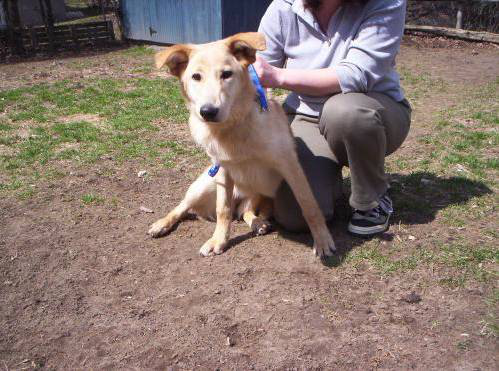

In [71]:
img1

In [72]:
x1 = img_to_array(img1.resize([64,64]))
x1 = x1.reshape((1,) + x1.shape)
if (classifier.predict_classes(x1)==1):
    print ("It is a Dog")
else:
    print ("It is a cat")


It is a Dog


In [80]:
img2=load_img('C:\\Users\\win\\Desktop\\Dataa Science\\My Github\\Cn\\dataset\\training_set\\cats\\cat.2.jpg')

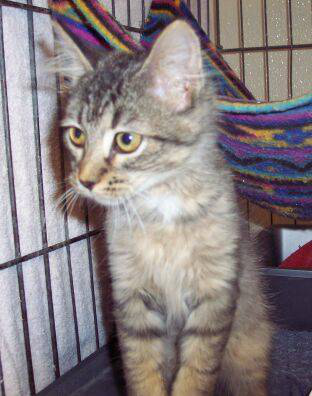

In [81]:

img2

In [82]:
x2=img_to_array(img2.resize([64,64]))
x2=x2.reshape((1,)+x2.shape)
if(classifier.predict_classes(x2)==1):
    print("It is a Dog")
else:
    print("It is cat")

It is cat
